In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["axes.unicode_minus"] = False
plt.style.use("ggplot")

pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 10)

# 0.Data Load
---

In [3]:
df_store = pd.read_csv("../LPOINT_BIG_COMP/LPOINT_BIG_COMP_05_BR.csv")
df_store.head()

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005


In [4]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   br_c      8808 non-null   object
 1   cop_c     8808 non-null   object
 2   zon_hlv   8808 non-null   object
 3   zon_mcls  8808 non-null   object
dtypes: object(4)
memory usage: 275.4+ KB


# 1.Values
---

In [5]:
# Number of Unique Values

for col in df_store.columns:
    unq_arr = df_store[col].unique()
    print(f"{col}: {df_store[col].nunique()}\t{['*']+unq_arr[:10] if df_store[col].nunique()>20 else unq_arr}")
    print()
print(f"Total DF Length: {len(df_store)}")

br_c: 8808	['*A010001' '*A010002' '*A010003' '*A010004' '*A010005' '*A010006'
 '*A010007' '*A010008' '*A010009' '*A010010']

cop_c: 11	['A01' 'A02' 'A03' 'A04' 'A05' 'B01' 'C01' 'C02' 'D01' 'D02' 'E01']

zon_hlv: 17	['Z17' 'Z16' 'Z13' 'Z10' 'Z15' 'Z12' 'Z03' 'Z11' 'Z14' 'Z06' 'Z09' 'Z04'
 'Z08' 'Z05' 'Z02' 'Z01' 'Z07']

zon_mcls: 257	['*Z17024' '*Z17018' '*Z17011' '*Z16007' '*Z17005' '*Z13003' '*Z17001'
 '*Z17020' '*Z10003' '*Z15003']

Total DF Length: 8808


- `A01~06` : 유통사
- `B01`: 숙박업종
- `C01~2`: 엔터테인먼트
- `D01~2`: F&B
- `E01`: 렌탈업종

In [6]:
aff_dict = {'A':'유통사','B':'숙박업종','C':'엔터테인먼트',
            'D':'F&B','E':'렌탈업종'}
df_store["cop_c_k"]=df_store["cop_c"].apply(lambda x: aff_dict[x[0]])

In [7]:
df_store.head()

,br_c,cop_c,zon_hlv,zon_mcls,cop_c_k
0,A010001,A01,Z17,Z17024,유통사
1,A010002,A01,Z17,Z17018,유통사
2,A010003,A01,Z17,Z17011,유통사
3,A010004,A01,Z16,Z16007,유통사
4,A010005,A01,Z17,Z17005,유통사


# 2.Visualization
---

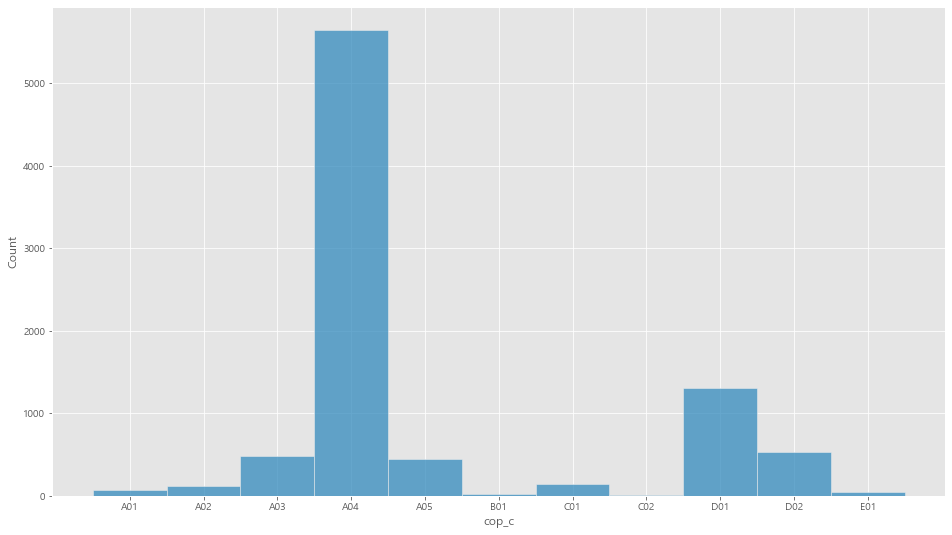

In [8]:
sns.histplot(df_store["cop_c"])
plt.show()

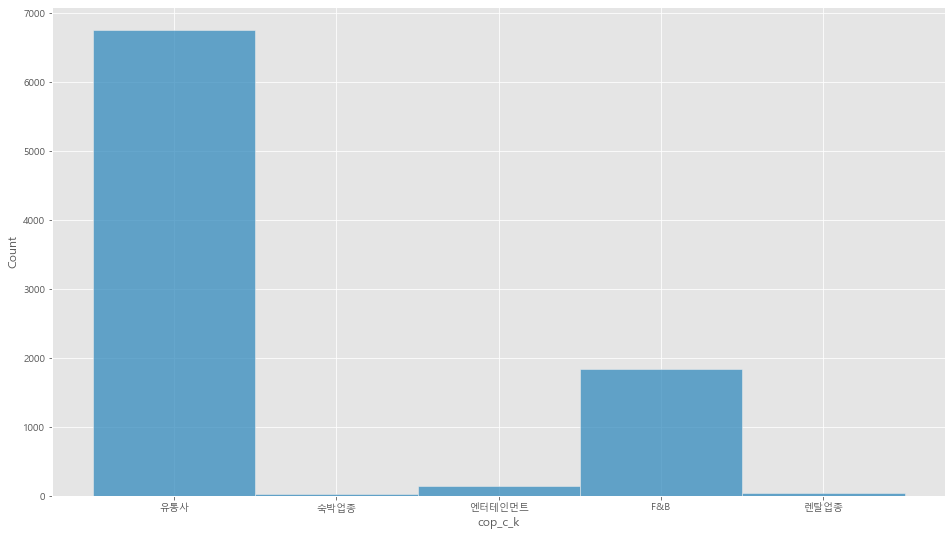

In [9]:
sns.histplot(df_store["cop_c_k"])
plt.show()

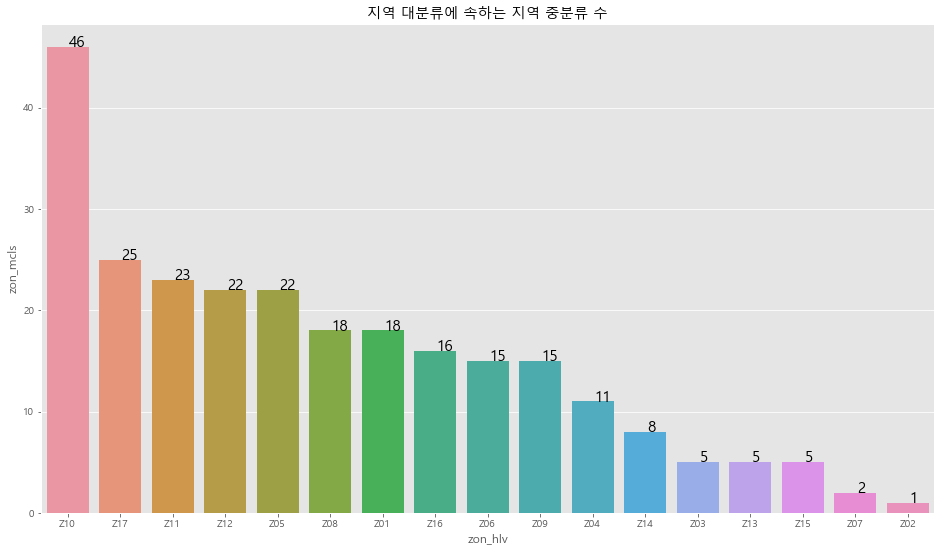

In [32]:
df_zn = df_store.groupby(by=["zon_hlv","zon_mcls"], as_index=False).count()[["zon_hlv","zon_mcls"]]
df_zn_grp = df_zn.groupby(by=["zon_hlv"],as_index=False).count().sort_values(by="zon_mcls", ascending=False)
sns.barplot(x=df_zn_grp["zon_hlv"], y=df_zn_grp["zon_mcls"])
x_loc = 0.03
for val in df_zn_grp["zon_mcls"]:
    plt.text(x=x_loc, y=val, s=f"{val}", size=15)
    x_loc+=1
plt.title("지역 대분류에 속하는 지역 중분류 수")
plt.show()